# Titre


# Desctiprtiond de la dataset

# Sommaire 

## Import the required libraries

In [79]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path 
import os
from urllib import request
import sys
import datetime

%matplotlib inline
sns.set_style("darkgrid") 
sns.set_context("notebook")

In [80]:
FILE = Path('__file__').resolve()
ROOT = FILE.parents[0]  # DATA-SCUENCE-PROJECTS root directory
if ROOT.as_posix() not in sys.path:
    sys.path.append(ROOT.as_posix())  # add ROOT to PATH
# ROOT = ROOT.relative_to(Path.cwd())

## Get the Data
### Download the Data

In [81]:
FILE_NAME = "paris_housing.csv"
DATA_URL  = "https://www.data.gouv.fr/fr/datasets/r/d72d537a-2f7f-40af-bf1a-289ee25d5ae9"
SAVE_PATH = ROOT / "datasets"

def fetch_housing_data(data_url=DATA_URL, save_path=SAVE_PATH, file_name=FILE_NAME, add_date=False):
    save_path =  Path(save_path)
    name, extension = os.path.splitext(file_name)
    save_path.mkdir(parents=True, exist_ok=True)
    date = datetime.datetime.now().strftime("%Y-%m-%d")
    try:
        request.urlretrieve(data_url, save_path / Path(name + (f'_{date}_' if add_date else "") + extension))
    except Exception as e:
        print(e)
        sys.exit()
    

In [82]:
fetch_housing_data(data_url=DATA_URL, save_path=SAVE_PATH, file_name=FILE_NAME, add_date=False)

In [5]:
paris_housing = pd.read_csv(SAVE_PATH / FILE_NAME, sep=';')

In [6]:
paris_housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d
0,2020,5,33,Saint-Georges,2,1946-1970,non meublé,23.7,28.44,16.59,PARIS,7510933,"{""coordinates"": [[[2.3392285502760473, 48.8767...","48.879934338782526,2.332850196555468"
1,2020,1,28,Gros-Caillou,2,1971-1990,meublé,30.2,36.24,21.14,PARIS,7510728,"{""coordinates"": [[[2.309544250136154, 48.85395...","48.858299903878766,2.3015415556941905"
2,2020,2,29,Champs-Elysées,1,Avant 1946,non meublé,32.7,39.24,22.89,PARIS,7510829,"{""coordinates"": [[[2.306463844245763, 48.87014...","48.86707449218534,2.3086516846813985"
3,2020,2,34,Chaussée-d'Antin,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510934,"{""coordinates"": [[[2.335450084489445, 48.87683...","48.87354738020909,2.3322688688697006"
4,2020,5,35,Faubourg-Montmartre,4,1971-1990,non meublé,21.7,26.04,15.19,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341"


In [7]:
paris_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annee                10240 non-null  int64  
 1   id_zone              10240 non-null  int64  
 2   id_quartier          10240 non-null  int64  
 3   nom_quartier         10240 non-null  object 
 4   piece                10240 non-null  int64  
 5   epoque               10240 non-null  object 
 6   meuble_txt           10240 non-null  object 
 7   ref                  10240 non-null  float64
 8   max                  10240 non-null  float64
 9   min                  10240 non-null  float64
 10  ville                10240 non-null  object 
 11  code_grand_quartier  10240 non-null  int64  
 12  geo_shape            10240 non-null  object 
 13  geo_point_2d         10240 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [8]:
# Variables Qualitatives
for col in paris_housing.select_dtypes('object'):
    print(f'========= {col} ==========')
    print(f'{paris_housing.loc[:, col].unique()} \n')

========= nom_quartier ==========
['Saint-Georges' 'Gros-Caillou' 'Champs-Elysées' "Chaussée-d'Antin"
 'Faubourg-Montmartre' 'Bercy' 'Roquette' 'Porte-Saint-Martin'
 'Sainte-Marguerite' 'Gare' 'Salpêtrière' 'Europe' 'Madeleine'
 'Porte-Saint-Denis' 'Quinze-Vingts' 'Saint-Germain-des-Prés'
 'Ecole-Militaire' 'Faubourg-du-Roule' 'Rochechouart' 'Chaillot' 'Muette'
 'Ternes' 'Grenelle' 'Plaisance' 'Parc-de-Montsouris' 'Javel 15Art'
 'Petit-Montrouge' 'Batignolles' 'Maison-Blanche' 'Saint-Lambert'
 'Grandes-Carrières' 'Croulebarbe' 'Auteuil' 'Necker' 'Bonne-Nouvelle'
 'Amérique' "Goutte-d'Or" 'Villette' 'Père-Lachaise' 'Clignancourt'
 'Pont-de-Flandre' 'Gaillon' 'Charonne' "St-Germain-l'Auxerrois"
 'Saint-Merri' 'Epinettes' 'Picpus' 'Notre-Dame' 'Sainte-Avoie'
 'Invalides' 'Notre-Dame-des-Champs' 'Combat' 'Hôpital-Saint-Louis'
 'Saint-Fargeau' 'La Chapelle' 'Bel-Air' 'Saint-Vincent-de-Paul'
 'Arts-et-Metiers' 'Val-de-Grace' 'Place-Vendôme' 'Halles' 'Monnaie'
 'Belleville' 'Folie-Méricourt' 

In [9]:
for col in paris_housing.select_dtypes('object'):
    print(f'========= {col} ==========')
    print(paris_housing.loc[:, col].value_counts(), '\n')

========= nom_quartier ==========
Saint-Georges            128
Gros-Caillou             128
Val-de-Grace             128
Arts-et-Metiers          128
Saint-Vincent-de-Paul    128
                        ... 
Javel 15Art              128
Parc-de-Montsouris       128
Plaisance                128
Grenelle                 128
Saint-Gervais            128
Name: nom_quartier, Length: 80, dtype: int64 

========= epoque ==========
1946-1970     2560
1971-1990     2560
Avant 1946    2560
Apres 1990    2560
Name: epoque, dtype: int64 

========= meuble_txt ==========
non meublé    5120
meublé        5120
Name: meuble_txt, dtype: int64 

========= ville ==========
PARIS    10240
Name: ville, dtype: int64 

========= geo_shape ==========
{"coordinates": [[[2.3392285502760473, 48.87679269118237], [2.338156525248434, 48.876861410361606], [2.337099204567835, 48.876714200619205], [2.335450084489445, 48.8768304912102], [2.334339473663466, 48.87691374711932], [2.332807360032859, 48.87684305482689], [2.

In [10]:
paris_housing.describe()

,annee,id_zone,id_quartier,piece,ref,max,min,code_grand_quartier
count,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,1.024000e+04
mean,2020.500000,6.662500,40.500000,2.500000,25.829805,30.996164,18.082487,7.511090e+06
std,1.118089,4.224966,23.093334,1.118089,4.202257,5.042818,2.941352,5.997236e+02
min,2019.000000,1.000000,1.000000,1.000000,14.300000,17.160000,10.010000,7.510101e+06
25%,2019.750000,3.000000,20.750000,1.750000,23.000000,27.600000,16.100000,7.510596e+06
50%,2020.500000,5.000000,40.500000,2.500000,25.500000,30.600000,17.850000,7.511090e+06
75%,2021.250000,11.000000,60.250000,3.250000,28.500000,34.200000,19.950000,7.511585e+06
max,2022.000000,14.000000,80.000000,4.000000,39.600000,47.520000,27.720000,7.512080e+06


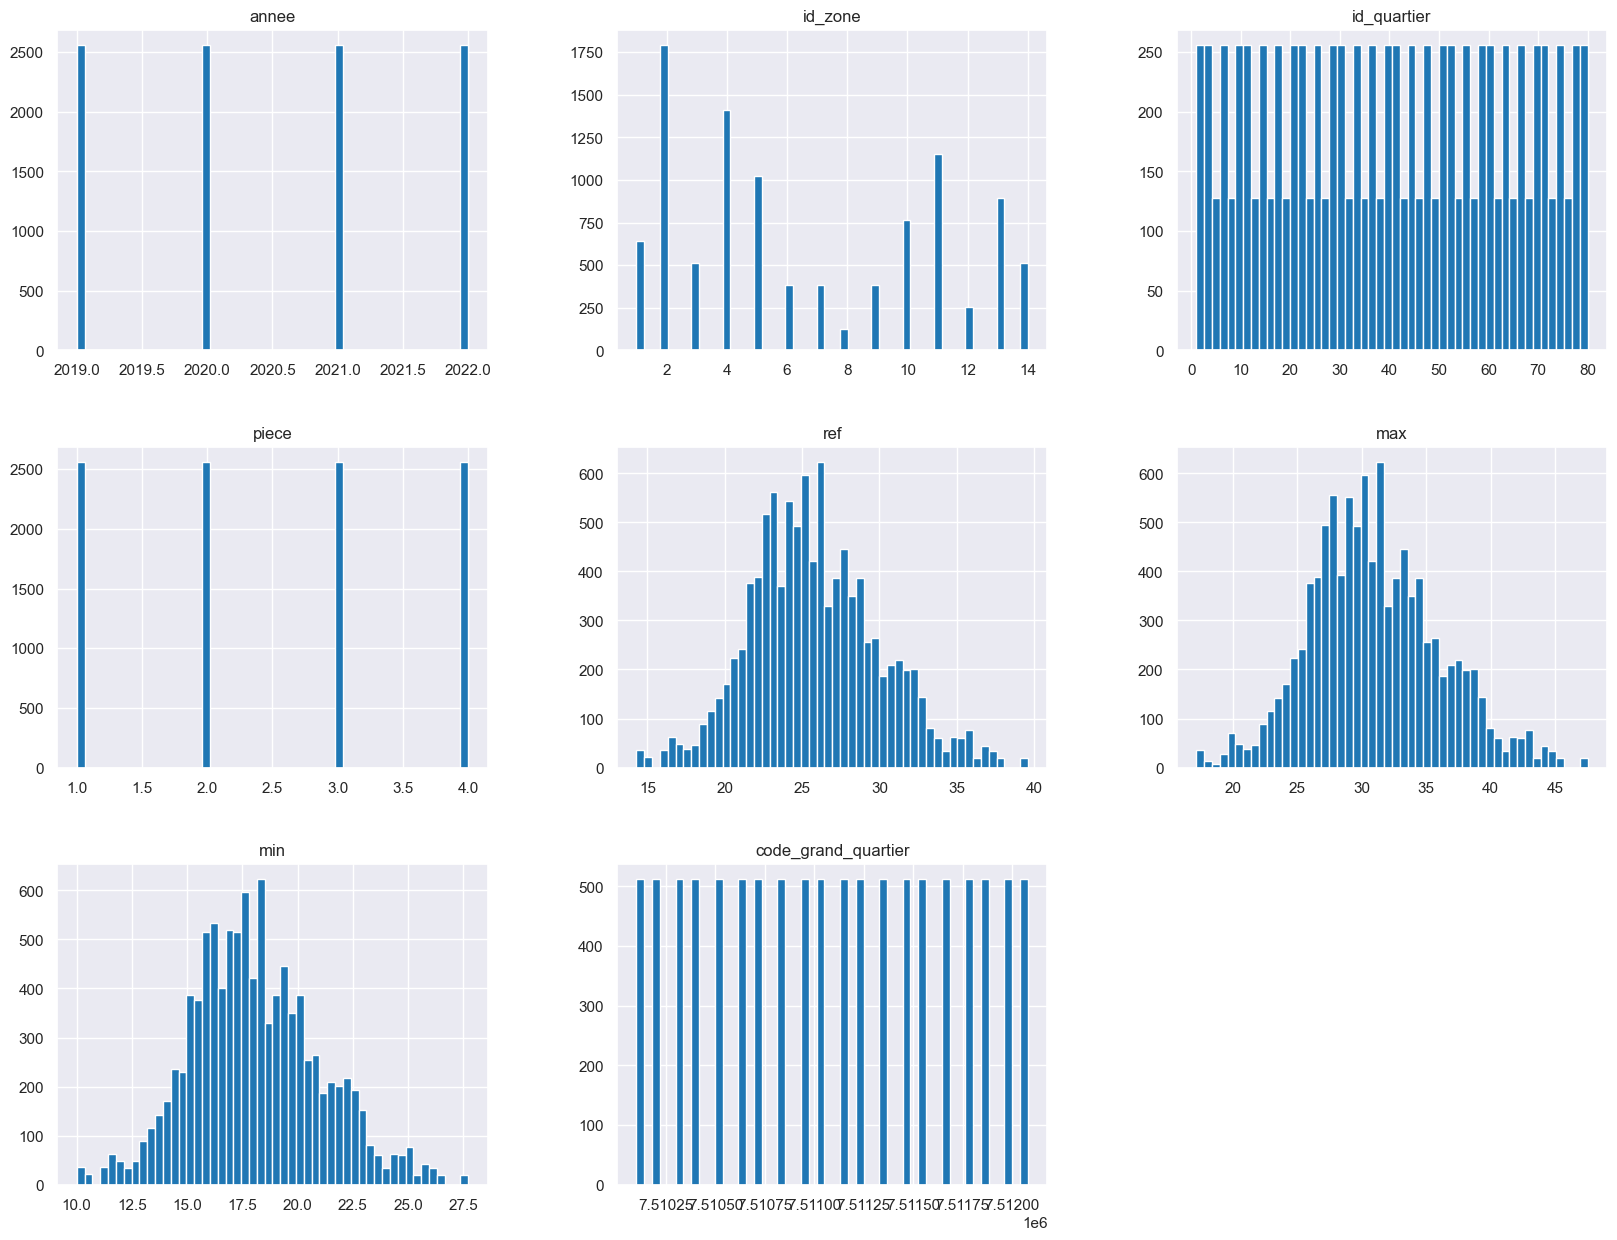

In [11]:
paris_housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Create a Test Set


In [12]:
from zlib import crc32

def test_set_check(id, test_rat):
    assert 0 <= test_rat <= 100, 'The rate of the parameter "test_rat" must be between [0, 100].'
    test_rat = test_rat if 0 <= test_rat <= 1 else test_rat/100
    return crc32(np.int64(id)) & 0xffffffff < test_rat * 2**32
    # return bytearray(hash(np.int64(id)).digest())[-1] < 256 * test_rat

def split_train_test(data, test_rat, by=None):
    data, by = (data.reset_index(), 'index') if by==None else (data, by) # adds an `index` column
    in_test_set = data[by].apply(lambda id_: test_set_check(id_, test_rat))
    return data.loc[~in_test_set, :], data.loc[in_test_set, :]

In [13]:
train_set, test_set = split_train_test(data=paris_housing, test_rat=0.2, by=None)
train_set.shape, test_set.shape

((8192, 15), (2048, 15))

max ref:  39.6 min ref:  14.3


<Axes: >

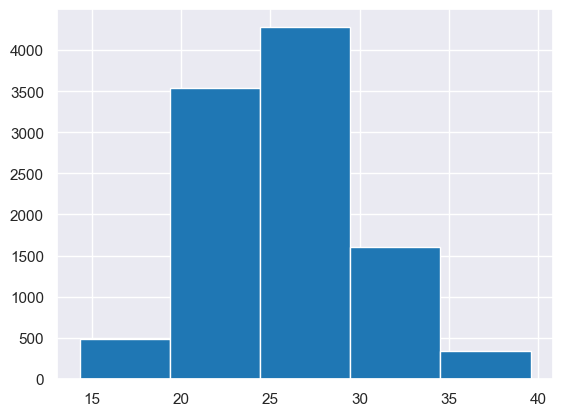

In [14]:
print('max ref: ', paris_housing.ref.max(), 'min ref: ', paris_housing.ref.min())
paris_housing.ref.hist(bins=5)

In [15]:
paris_housing['ref_cat'] = pd.cut(paris_housing['ref'],
                                  bins=[10., 15., 20., 25., 30., 35, 40, np.inf],
                                  labels=[1, 2, 3, 4, 5, 6, 7])

In [16]:
paris_housing.ref_cat.value_counts(ascending=True)

7       0
1      42
6     271
2     635
5    1369
3    3950
4    3973
Name: ref_cat, dtype: int64

<Axes: >

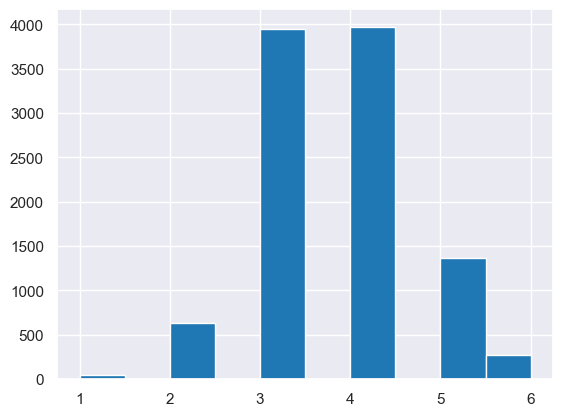

In [17]:
paris_housing.ref_cat.hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_shuffle_split.split(paris_housing, paris_housing['ref_cat']):
    strat_train_set = paris_housing.loc[train_index]
    strat_test_set = paris_housing.loc[test_index]

In [19]:
strat_train_set.shape, strat_test_set.shape

((8192, 15), (2048, 15))

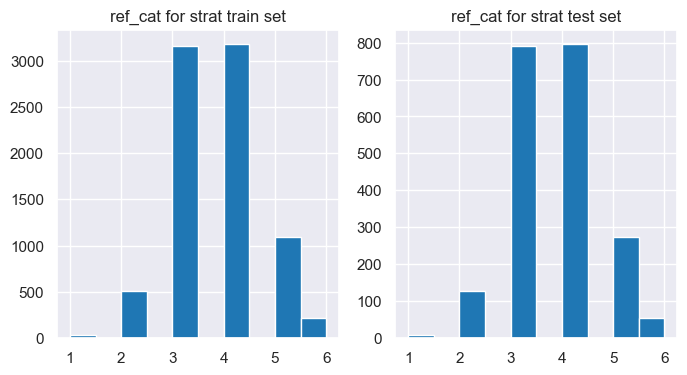

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
titels = ['ref_cat for strat train set', 
          'ref_cat for strat test set']
for titel, ax, set_ in zip(titels, axes.flatten(), [strat_train_set, strat_test_set]):
    ax.hist(set_['ref_cat'])
    ax.set_title(titel)

In [21]:
compare_props = pd.DataFrame({
    "strat train set": strat_train_set.ref_cat.value_counts() / len(strat_train_set),
    "strat test set": strat_test_set.ref_cat.value_counts() / len(strat_test_set),
    },
    index=strat_test_set.ref_cat.unique().sort_values()
    ).sort_index()

compare_props.head(5)

,strat train set,strat test set
1,0.004150,0.003906
2,0.062012,0.062012
3,0.385742,0.385742
4,0.387939,0.388184
5,0.133667,0.133789


In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('ref_cat', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights


In [23]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

In [24]:
housing['longitude'] = housing['geo_point_2d'].apply(lambda x: float(x.split(',')[0]))
housing['latitude'] = housing['geo_point_2d'].apply(lambda x: float(x.split(',')[1]))

housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,longitude,latitude
2950,2020,2,1,St-Germain-l'Auxerrois,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510101,"{""coordinates"": [[[2.344593389828428, 48.85404...","48.860650135209916,2.3349103292802087",48.860650,2.334910
763,2020,11,71,Goutte-d'Or,1,1946-1970,non meublé,23.9,28.68,16.73,PARIS,7511871,"{""coordinates"": [[[2.349667597643656, 48.88373...","48.89213818760239,2.3555361632962777",48.892138,2.355536
161,2022,13,73,Villette,4,Apres 1990,meublé,18.9,22.68,13.23,PARIS,7511973,"{""coordinates"": [[[2.370498649617153, 48.87819...","48.88766108880346,2.3744682121256626",48.887661,2.374468
189,2022,4,8,Bonne-Nouvelle,4,Apres 1990,meublé,27.9,33.48,19.53,PARIS,7510208,"{""coordinates"": [[[2.351518483670822, 48.86442...","48.867150118310704,2.350080190408817",48.867150,2.350080
9925,2019,12,56,Plaisance,4,1946-1970,meublé,20.9,25.10,14.60,PARIS,7511456,"{""coordinates"": [[[2.321133015885315, 48.83990...","48.83031704260008,2.3153049315734164",48.830317,2.315305


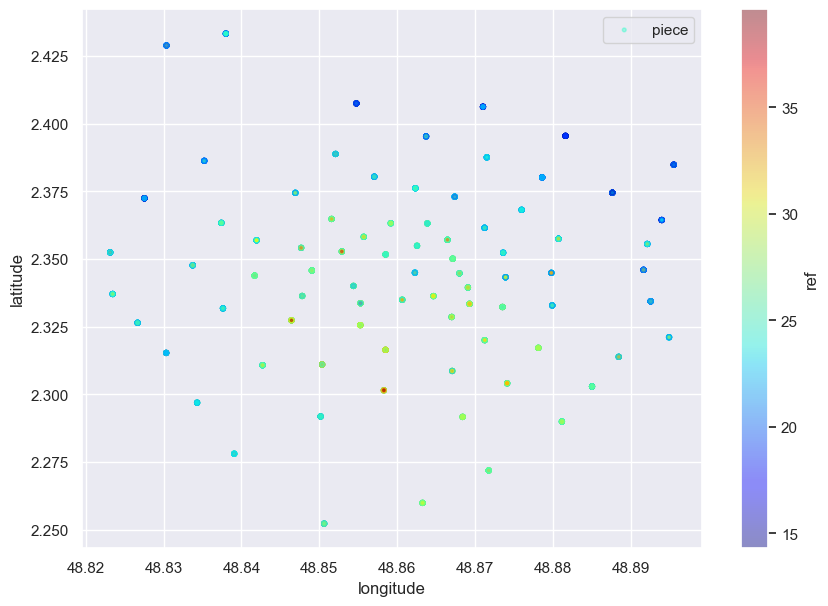

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["piece"]*3, label="piece", figsize=(10,7),
             c="ref", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [40]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import shapely.geometry
import json
#from geodatasets import get_path

In [27]:
housing = housing.assign(pays='FRANCE')
housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,longitude,latitude,pays
2950,2020,2,1,St-Germain-l'Auxerrois,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510101,"{""coordinates"": [[[2.344593389828428, 48.85404...","48.860650135209916,2.3349103292802087",48.860650,2.334910,FRANCE
763,2020,11,71,Goutte-d'Or,1,1946-1970,non meublé,23.9,28.68,16.73,PARIS,7511871,"{""coordinates"": [[[2.349667597643656, 48.88373...","48.89213818760239,2.3555361632962777",48.892138,2.355536,FRANCE
161,2022,13,73,Villette,4,Apres 1990,meublé,18.9,22.68,13.23,PARIS,7511973,"{""coordinates"": [[[2.370498649617153, 48.87819...","48.88766108880346,2.3744682121256626",48.887661,2.374468,FRANCE
189,2022,4,8,Bonne-Nouvelle,4,Apres 1990,meublé,27.9,33.48,19.53,PARIS,7510208,"{""coordinates"": [[[2.351518483670822, 48.86442...","48.867150118310704,2.350080190408817",48.867150,2.350080,FRANCE
9925,2019,12,56,Plaisance,4,1946-1970,meublé,20.9,25.10,14.60,PARIS,7511456,"{""coordinates"": [[[2.321133015885315, 48.83990...","48.83031704260008,2.3153049315734164",48.830317,2.315305,FRANCE


In [42]:
housing['geo_shape_json'] = housing['geo_shape'].apply(json.loads) 
housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,longitude,latitude,pays,geo_shape_json
2950,2020,2,1,St-Germain-l'Auxerrois,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510101,"{""coordinates"": [[[2.344593389828428, 48.85404...","48.860650135209916,2.3349103292802087",48.860650,2.334910,FRANCE,"{'coordinates': [[[2.344593389828428, 48.85404..."
763,2020,11,71,Goutte-d'Or,1,1946-1970,non meublé,23.9,28.68,16.73,PARIS,7511871,"{""coordinates"": [[[2.349667597643656, 48.88373...","48.89213818760239,2.3555361632962777",48.892138,2.355536,FRANCE,"{'coordinates': [[[2.349667597643656, 48.88373..."
161,2022,13,73,Villette,4,Apres 1990,meublé,18.9,22.68,13.23,PARIS,7511973,"{""coordinates"": [[[2.370498649617153, 48.87819...","48.88766108880346,2.3744682121256626",48.887661,2.374468,FRANCE,"{'coordinates': [[[2.370498649617153, 48.87819..."
189,2022,4,8,Bonne-Nouvelle,4,Apres 1990,meublé,27.9,33.48,19.53,PARIS,7510208,"{""coordinates"": [[[2.351518483670822, 48.86442...","48.867150118310704,2.350080190408817",48.867150,2.350080,FRANCE,"{'coordinates': [[[2.351518483670822, 48.86442..."
9925,2019,12,56,Plaisance,4,1946-1970,meublé,20.9,25.10,14.60,PARIS,7511456,"{""coordinates"": [[[2.321133015885315, 48.83990...","48.83031704260008,2.3153049315734164",48.830317,2.315305,FRANCE,"{'coordinates': [[[2.321133015885315, 48.83990..."


In [50]:
gdf =  geopandas.GeoDataFrame(
    housing, 
    # geometry = geopandas.points_from_xy(housing.longitude, housing.latitude), crs="EPSG:4326",
    # polygone = housing.geo_shape_json.apply(shapely.geometry.shape)
    geometry = housing.geo_shape_json.apply(shapely.geometry.shape), 
    crs="EPSG:4326"
)
# polygone = geopandas.GeoSeries(shapely.geometry.shape(housing[housing.geo_shape_json.notnull()]))

In [52]:
gdf["area"] = gdf.area
gdf["area"]


C:\Users\Brani\AppData\Local\Temp\ipykernel_18584\2714091422.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


2950    0.000107
763     0.000134
161     0.000158
189     0.000035
9925    0.000219
          ...   
9891    0.000159
3883    0.000098
2350    0.000158
741     0.000038
6045    0.000067
Name: area, Length: 8192, dtype: float64

In [53]:
gdf["centroid"] = gdf.centroid
gdf["centroid"]

C:\Users\Brani\AppData\Local\Temp\ipykernel_18584\2143033591.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.centroid


2950    POINT (2.33491 48.86065)
763     POINT (2.35554 48.89214)
161     POINT (2.37447 48.88766)
189     POINT (2.35008 48.86715)
9925    POINT (2.31530 48.83032)
                  ...           
9891    POINT (2.38013 48.87864)
3883    POINT (2.30412 48.87414)
2350    POINT (2.37447 48.88766)
741     POINT (2.35167 48.85852)
6045    POINT (2.33227 48.87355)
Name: centroid, Length: 8192, dtype: geometry

In [32]:
df_location = housing.loc[:, ['ville', 'pays', 'latitude', 'longitude', 'geo_shape']]
df_location.head(5)

,ville,pays,latitude,longitude,geo_shape
2950,PARIS,FRANCE,2.334910,48.860650,"{""coordinates"": [[[2.344593389828428, 48.85404..."
763,PARIS,FRANCE,2.355536,48.892138,"{""coordinates"": [[[2.349667597643656, 48.88373..."
161,PARIS,FRANCE,2.374468,48.887661,"{""coordinates"": [[[2.370498649617153, 48.87819..."
189,PARIS,FRANCE,2.350080,48.867150,"{""coordinates"": [[[2.351518483670822, 48.86442..."
9925,PARIS,FRANCE,2.315305,48.830317,"{""coordinates"": [[[2.321133015885315, 48.83990..."


<Axes: >

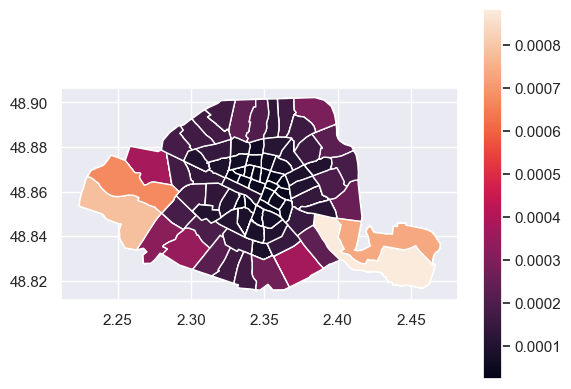

In [62]:
gdf.plot("area", legend=True, )

Text(0.5, 1.0, 'mape de paris')

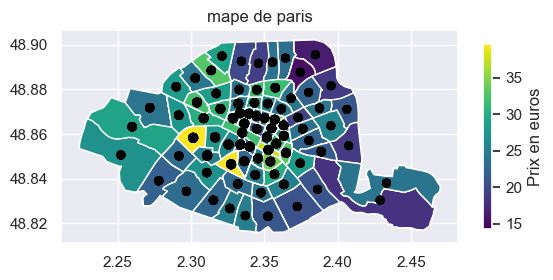

In [76]:
lst=[]

ax = gdf.plot(column=housing.ref, cmap='viridis', legend=True, 
              legend_kwds={'shrink': 0.5, # réduire la taille de la barre de couleur
                           'label': 'Prix en euros', # ajouter un titre à la barre de couleur
                           'format': '%.0f'}) # formater les valeurs de la barre de couleur)
gdf["centroid"].plot(ax=ax, color="black", markersize=housing.ref)
ax.set_title('mape de paris')

In [85]:
# gdf.explore("area", legend=False)

In [226]:
housing.geo_point_2d.iloc[0]

'48.860650135209916,2.3349103292802087'